# Titanic Data : Logistic Regression

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder #1-hot encoder (Categorical --> Binary Hot Encoding)
from sklearn.model_selection import train_test_split #train_test split
from sklearn.linear_model import LogisticRegression #to call the model
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score #Crossvalidation

In [3]:
df_titanic = pd.read_csv('train_dt.csv')

In [4]:
df_titanic.head(2)

Loan_ID Gender Married Dependents Education Self_Employed  \
0  LP001002   Male      No          0  Graduate            No   
1  LP001003   Male     Yes          1  Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N

In [5]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


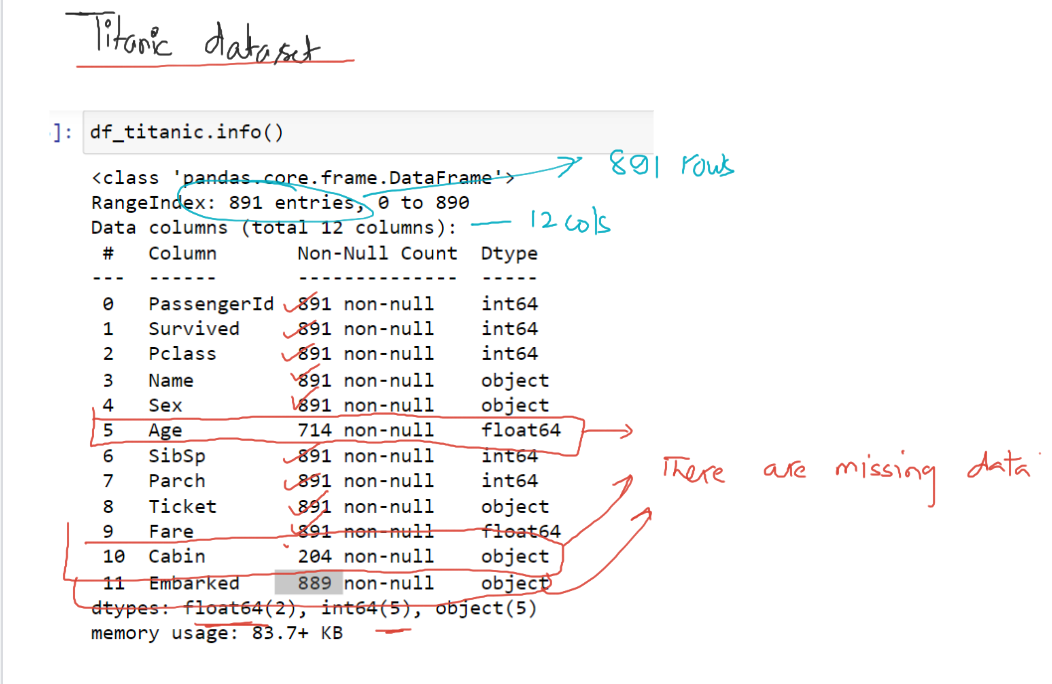

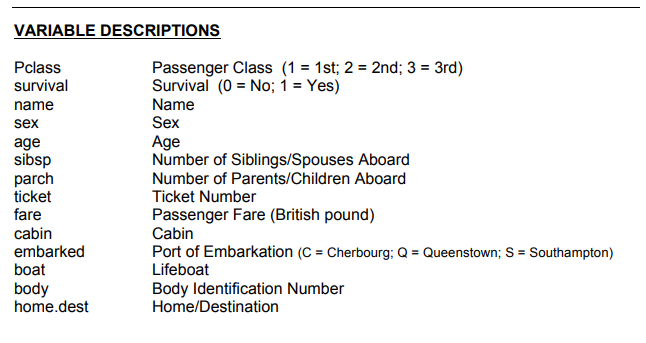

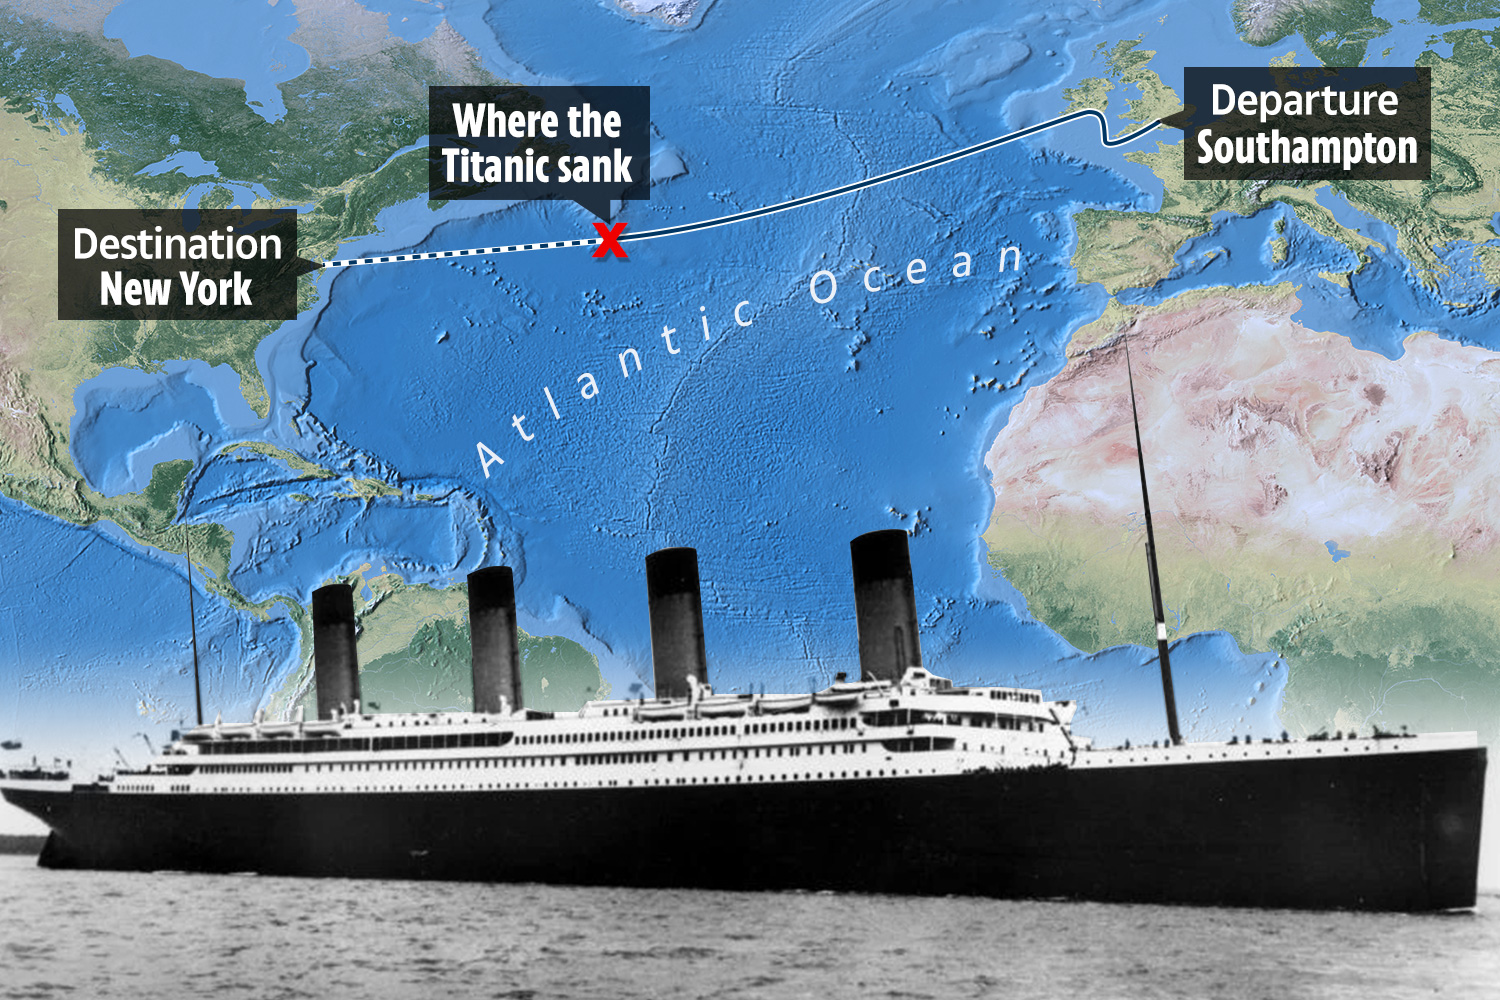

### Identify the missing value

`Percent of the missing data in each column if it is`

In [6]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### %age of missing data

In [7]:
df_titanic.isna().sum()/len(df_titanic)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

**Takeway from training dataset: Three columns `Age`, `Cabin`, `Embarked` have missing values**

### `Tasks`

1. Drop the `cabin` column from the data as it has 77% missing data
2. Impute `Age` with the average age per `Pclass`
3. Impute `Embarked` with the mode

4. Detailed `EDA on different variables` to understand their relationship

#### Drop the column `Cabin`

In [8]:
df_titanic.drop('Cabin', axis=1, inplace=True)

In [9]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

### Let us also drop `PassengerId` `Name`, `Fare` and `Ticket`

In [10]:
df_titanic.drop(['PassengerId','Ticket','Name','Fare'],axis=1, inplace=True)

In [11]:
df_titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

### Handling the age column - missing records

#### - Impute the ages with the average per Pclass

In [13]:
def impute_age(col):
    Age = col[0] #to select the column for imputation
    Pclass = col[1]
    if pd.isnull(Age):
        return (df_titanic[df_titanic['Pclass']==Pclass]['Age'].mean())
    else:
        return Age

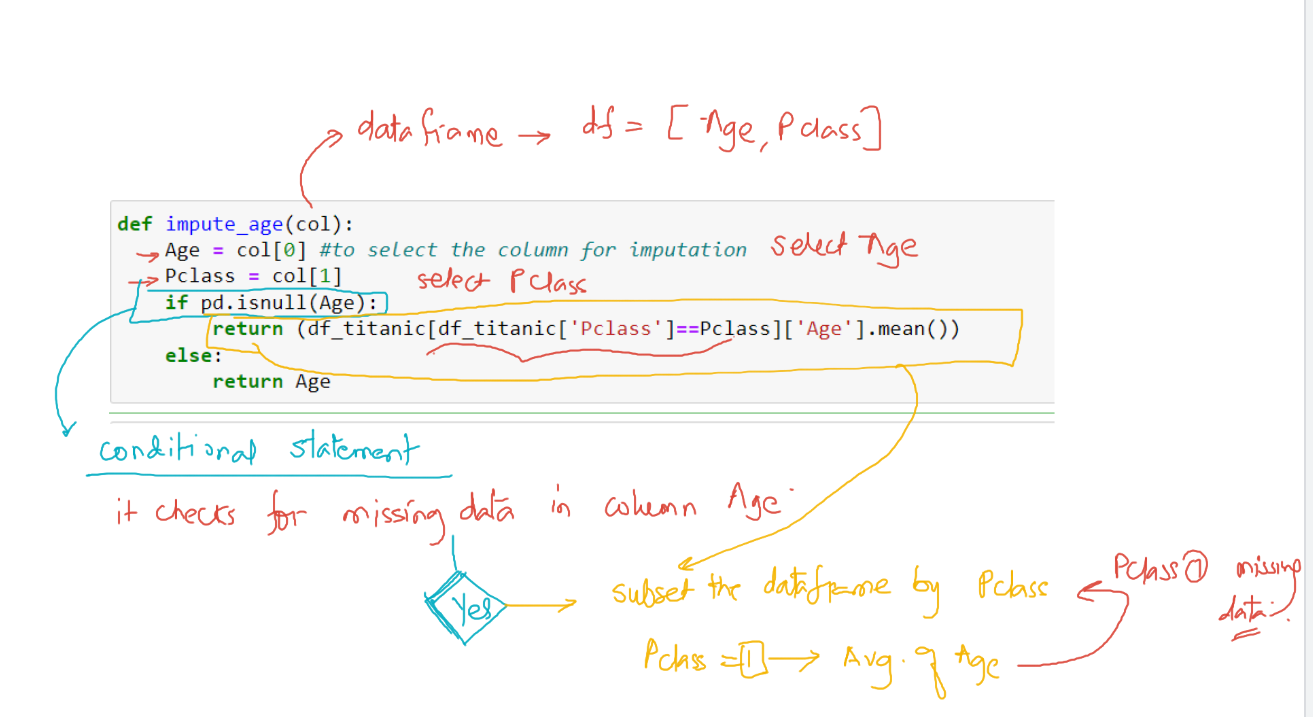

In [14]:
df_titanic_sub = df_titanic[['Age', 'Pclass']]

In [15]:
df_titanic_sub

Age  Pclass
0    22.0       3
1    38.0       1
2    26.0       3
3    35.0       1
4    35.0       3
..    ...     ...
886  27.0       2
887  19.0       1
888   NaN       3
889  26.0       1
890  32.0       3

[891 rows x 2 columns]

In [17]:
df_titanic_sub.

Age       22.0
Pclass     3.0
Name: 0, dtype: float64

### Imputed missing records in Age as per Pclass

In [18]:
df_titanic['Age'] = df_titanic[['Age', 'Pclass']].apply(impute_age, axis=1)

In [20]:
df_titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [21]:
df_titanic

Survived  Pclass     Sex       Age  SibSp  Parch Embarked
0           0       3    male  22.00000      1      0        S
1           1       1  female  38.00000      1      0        C
2           1       3  female  26.00000      0      0        S
3           1       1  female  35.00000      1      0        S
4           0       3    male  35.00000      0      0        S
..        ...     ...     ...       ...    ...    ...      ...
886         0       2    male  27.00000      0      0        S
887         1       1  female  19.00000      0      0        S
888         0       3  female  25.14062      1      2        S
889         1       1    male  26.00000      0      0        C
890         0       3    male  32.00000      0      0        Q

[891 rows x 7 columns]

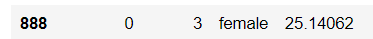

In [23]:
df_titanic_sub[df_titanic_sub['Pclass']==3]['Age'].mean()

25.14061971830986

### Distribution of  age by Pclass

In [41]:
sel_pclass = df_titanic_sub['Pclass']==3

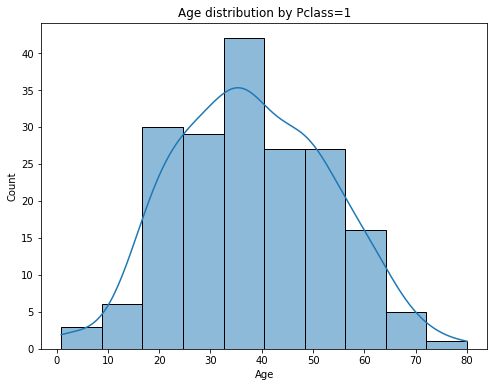

In [38]:
plt.subplots(figsize = (8,6))
sns.histplot(df_titanic_sub[sel_pclass]['Age'], bins=10, kde=True)
plt.title('Age distribution by Pclass=1')
plt.show()

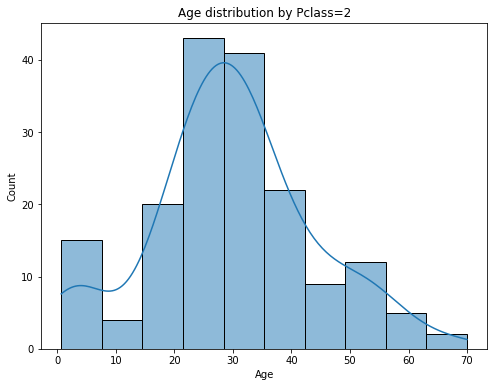

In [40]:
plt.subplots(figsize = (8,6))
sns.histplot(df_titanic_sub[sel_pclass]['Age'], bins=10, kde=True)
plt.title('Age distribution by Pclass=2')
plt.show()

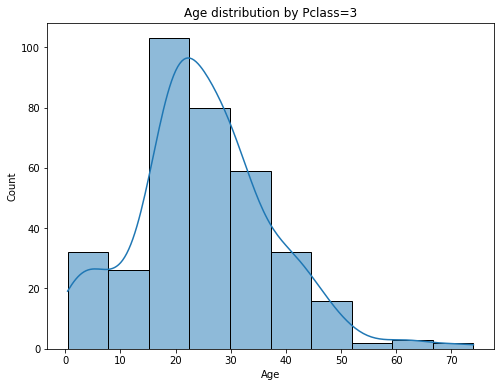

In [42]:
plt.subplots(figsize = (8,6))
sns.histplot(df_titanic_sub[sel_pclass]['Age'], bins=10,kde=True)
plt.title('Age distribution by Pclass=3')
plt.show()

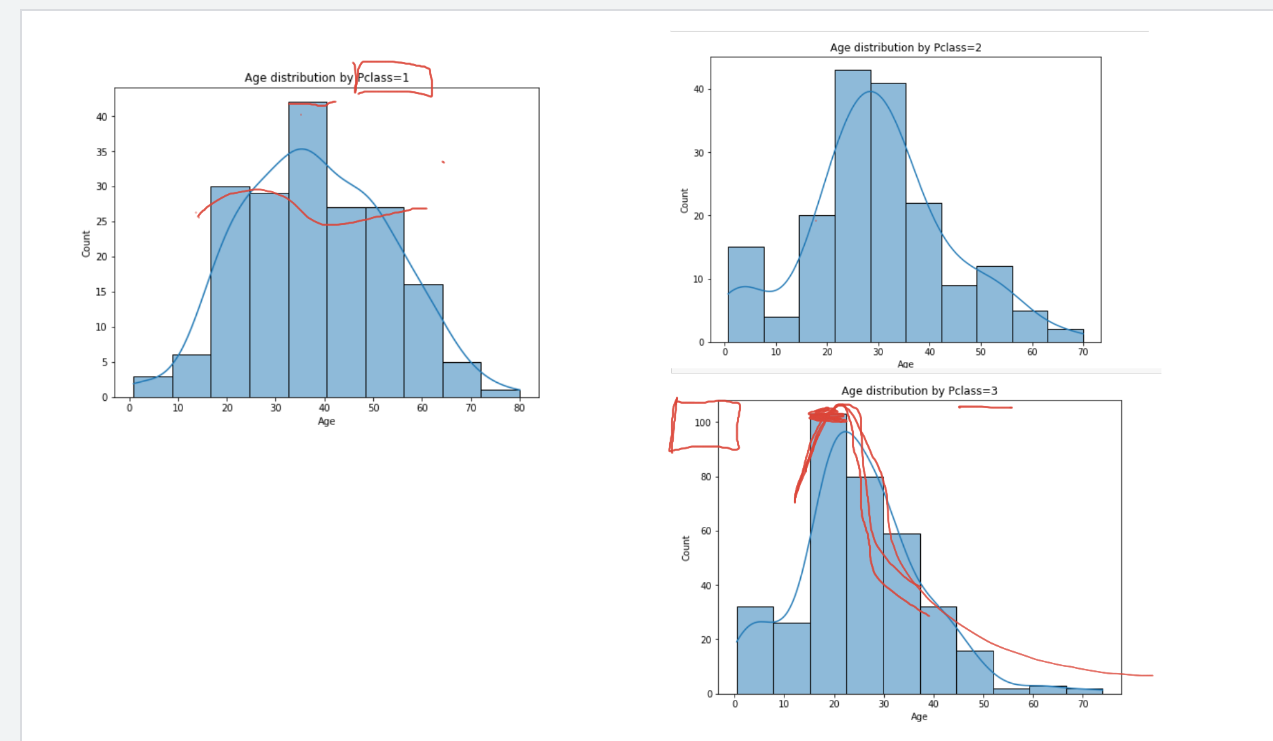

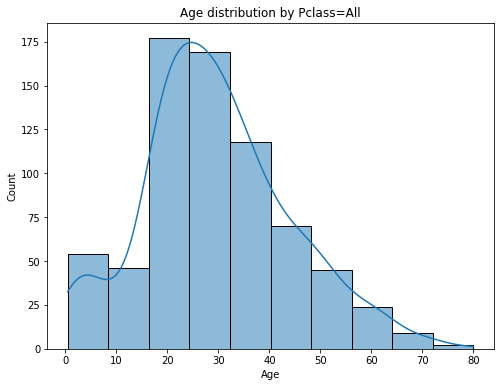

In [45]:
plt.subplots(figsize = (8,6))
sns.histplot(df_titanic_sub['Age'], bins=10, kde=True)
plt.title('Age distribution by Pclass=All')
plt.show()

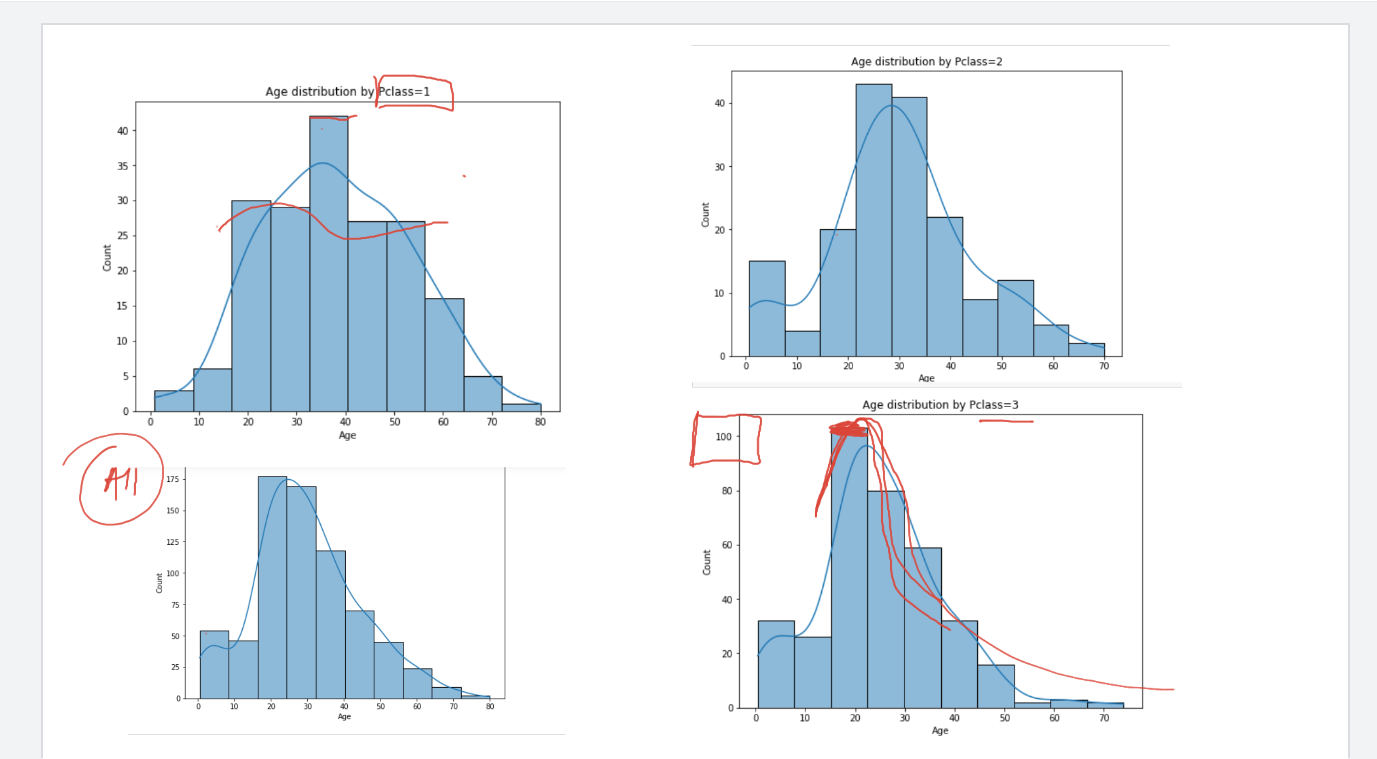

### Handling the Embarked column

- There are just `two` missing records, we will impute it with the `mode` of the embarked column

In [46]:
df_titanic['Embarked'].fillna(df_titanic["Embarked"].mode()[0], inplace=True)

In [47]:
df_titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [49]:
df_titanic.sample(5)

Survived  Pclass     Sex        Age  SibSp  Parch Embarked
74          1       3    male  32.000000      0      0        S
514         0       3    male  24.000000      0      0        S
270         0       1    male  38.233441      0      0        S
471         0       3    male  38.000000      0      0        S
276         0       3  female  45.000000      0      0        S

In [53]:
df_titanic['Embarked'].mode()[0]

'S'

In [54]:
df_titanic[df_titanic['Embarked']=="Q"]

Survived  Pclass     Sex       Age  SibSp  Parch Embarked
5           0       3    male  25.14062      0      0        Q
16          0       3    male   2.00000      4      1        Q
22          1       3  female  15.00000      0      0        Q
28          1       3  female  25.14062      0      0        Q
32          1       3  female  25.14062      0      0        Q
..        ...     ...     ...       ...    ...    ...      ...
790         0       3    male  25.14062      0      0        Q
825         0       3    male  25.14062      0      0        Q
828         1       3    male  25.14062      0      0        Q
885         0       3  female  39.00000      0      5        Q
890         0       3    male  32.00000      0      0        Q

[77 rows x 7 columns]

In [55]:
df_titanic[df_titanic['Embarked']=="C"]

Survived  Pclass     Sex       Age  SibSp  Parch Embarked
1           1       1  female  38.00000      1      0        C
9           1       2  female  14.00000      1      0        C
19          1       3  female  25.14062      0      0        C
26          0       3    male  25.14062      0      0        C
30          0       1    male  40.00000      0      0        C
..        ...     ...     ...       ...    ...    ...      ...
866         1       2  female  27.00000      1      0        C
874         1       2  female  28.00000      1      0        C
875         1       3  female  15.00000      0      0        C
879         1       1  female  56.00000      0      1        C
889         1       1    male  26.00000      0      0        C

[168 rows x 7 columns]

### Examine the distribution of `Target` column - Survived

#### Plot the count of survived wrt `sex`

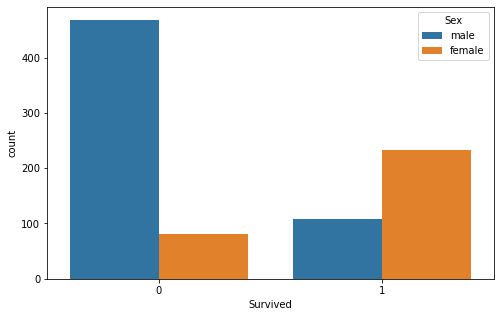

In [56]:
plt.subplots(figsize=(8,5))
sns.countplot(x='Survived', hue='Sex', data=df_titanic)
plt.show()

#### Observation: `sex` is the one of the key variables for the survival

#### Plot the count of survived wrt `PClass`

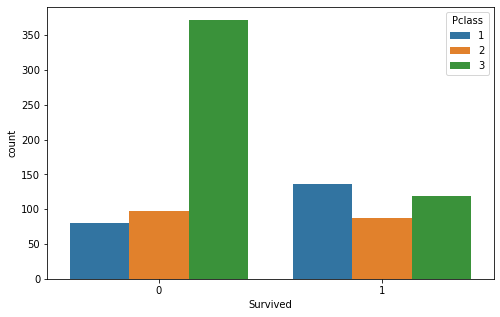

In [57]:
plt.subplots(figsize=(8,5))
sns.countplot(x='Survived', hue='Pclass', data=df_titanic)
plt.show()

#### Observation: `Pclass` is the another key variables for the survival

In [58]:
df_titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

### Summary table to show #count (number) of survived or died by Pclass --> Sex 

`df_titanic.groupby()`

In [61]:
df_titanic.groupby(['Survived', 'Pclass', 'Sex']).agg(
Total_count = ('Pclass', 'count')).reset_index()

Survived  Pclass     Sex  Total_count
0          0       1  female            3
1          0       1    male           77
2          0       2  female            6
3          0       2    male           91
4          0       3  female           72
5          0       3    male          300
6          1       1  female           91
7          1       1    male           45
8          1       2  female           70
9          1       2    male           17
10         1       3  female           72
11         1       3    male           47

In [62]:
df_titanic.groupby([ 'Pclass', 'Sex']).agg(
Total_count = ('Pclass', 'count')).reset_index()

Pclass     Sex  Total_count
0       1  female           94
1       1    male          122
2       2  female           76
3       2    male          108
4       3  female          144
5       3    male          347

### Encoding Categorical Variables

- It is the process of converting `categorical data` (represents categories/labels) into a `numerical format` that can be used in ML algos

- A. **Label Encoding**: Assign a unique numerical label to each category. Order of the labels may be arbitrary

    `Example: Category A--> 0, B---> 1, C-->2`
    
- B. **One Hot Encoding**: Creates binary columns for each category. Leads to `high dimensional feature space` - RECOMMENDED!


In [63]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


- We have categorical variables such as `Sex`, `Embarked` and `Pclass`

In [64]:
def create_encoding(df, col_name):
    dummies = pd.get_dummies(df[col_name], prefix=col_name)
    df=pd.concat([df, dummies], axis=1)
    return df

In [65]:
df_titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [76]:
df_titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [80]:
df_titanic_final = df_titanic

In [78]:
del df_titanic_final

In [81]:
for col in ['Pclass', 'Sex', 'Embarked']:
    df_titanic_final = create_encoding(df_titanic_final,col)

In [82]:
df_titanic.sample(2)

Survived  Pclass   Sex   Age  SibSp  Parch Embarked
876         0       3  male  20.0      0      0        S
434         0       1  male  50.0      1      0        S

In [84]:
df_titanic_final.sample(5)

Survived  Pclass     Sex   Age  SibSp  Parch Embarked  Pclass_1  \
389         1       2  female  17.0      0      0        C         0   
192         1       3  female  19.0      1      0        S         0   
206         0       3    male  32.0      1      0        S         0   
838         1       3    male  32.0      0      0        S         0   
11          1       1  female  58.0      0      0        S         1   

     Pclass_2  Pclass_3  Sex_female  Sex_male  Embarked_C  Embarked_Q  \
389         1         0           1         0           1           0   
192         0         1           1         0           0           0   
206         0         1           0         1           0           0   
838         0         1           0         1           0           0   
11          0         0           1         0           0           0   

     Embarked_S  
389           0  
192           1  
206           1  
838           1  
11            1

In [85]:
df_titanic_final.drop(['Pclass', 'Sex', 'Embarked'], axis=1, inplace=True)

In [86]:
df_titanic_final

Survived       Age  SibSp  Parch  Pclass_1  Pclass_2  Pclass_3  \
0           0  22.00000      1      0         0         0         1   
1           1  38.00000      1      0         1         0         0   
2           1  26.00000      0      0         0         0         1   
3           1  35.00000      1      0         1         0         0   
4           0  35.00000      0      0         0         0         1   
..        ...       ...    ...    ...       ...       ...       ...   
886         0  27.00000      0      0         0         1         0   
887         1  19.00000      0      0         1         0         0   
888         0  25.14062      1      2         0         0         1   
889         1  26.00000      0      0         1         0         0   
890         0  32.00000      0      0         0         0         1   

     Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0             0         1           0           0           1  
1             1         0           1           0           0  
2             1         0           0           0           1  
3             1         0           0           0           1  
4             0         1           0           0           1  
..          ...       ...         ...         ...         ...  
886           0         1           0           0           1  
887           1         0           0           0           1  
888           1         0           0           0           1  
889           0         1           1           0           0  
890           0         1           0           1           0  

[891 rows x 12 columns]

### Create train and validation sets

In [87]:
df_titanic_final.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [101]:
df_titanic_final.sample(2)

Survived   Age  SibSp  Parch  Pclass_1  Pclass_2  Pclass_3  Sex_female  \
645         1  48.0      1      0         1         0         0           0   
24          0   8.0      3      1         0         0         1           1   

     Sex_male  Embarked_C  Embarked_Q  Embarked_S  
645         1           1           0           0  
24          0           0           0           1

In [88]:
input_vars = ['Age', 'SibSp', 'Parch', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

In [89]:
X = df_titanic_final[input_vars]

In [91]:
X.sample(2)

Age  SibSp  Parch  Pclass_1  Pclass_2  Pclass_3  Sex_female  \
388  25.14062      0      0         0         0         1           0   
771  48.00000      0      0         0         0         1           0   

     Sex_male  Embarked_C  Embarked_Q  Embarked_S  
388         1           0           1           0  
771         1           0           0           1

In [92]:
y = df_titanic_final['Survived']

In [94]:
y.sample(2)

121    0
716    1
Name: Survived, dtype: int64

In [95]:
train_X, val_X, train_y, val_y = train_test_split(X,y, test_size=.20, random_state=45)

In [96]:
train_X.shape, val_X.shape

((712, 11), (179, 11))

In [97]:
len(X)

891

In [99]:
712/891*100

79.91021324354658

### Training the model

In [102]:
log_reg_model_1 = LogisticRegression() #creating the model object

In [103]:
log_reg_model_1

LogisticRegression()

In [104]:
log_reg_model_1.fit(train_X, train_y)

LogisticRegression()

### Validating the model

In [105]:
pred_values = log_reg_model_1.predict(val_X) #test/validation set

In [106]:
pred_values #predicted values for survival for validation set

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0], dtype=int64)

### Calculate performance metrics of the model

In [107]:
acc = accuracy_score(val_y, pred_values)

In [108]:
print('Accuracy of the model is:', acc*100)

Accuracy of the model is: 84.35754189944134


### Plot the confusion matrix using heatmap

#### To calculate the confusion matrix

In [109]:
cm = confusion_matrix(val_y, pred_values) #predicted vs actual

In [110]:
cm

array([[102,  15],
       [ 13,  49]], dtype=int64)

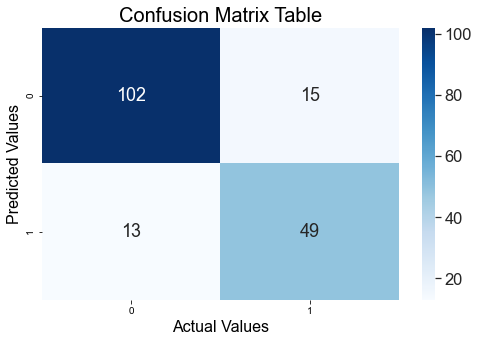

In [111]:
plt.subplots(figsize=(8,5))
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Table', fontsize=20)
plt.xlabel('Actual Values', fontsize=16)
plt.ylabel('Predicted Values', fontsize=16)

plt.show()

In [113]:
(102+49)/(102+49+13+15)*100

84.35754189944134

In [114]:
- Agenda:
    1. Multicollinearity & VIF
    2. Performance Metrics - Accuracy, Precision ..blah -- Imbalanced Data
    3. Interpreting Linear and Logistic coeff - Statmodels
    4. Pros/Cons for Linear and Log
    5. Decision Trees - Gentle introduction

SyntaxError: invalid syntax (<ipython-input-114-7ed7c3bfb224>, line 1)